# Определение тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 



## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Просмотр данных

Рецензия

In [ ]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


Правильный ответ

In [ ]:
y_train[3]

1

## Раскодируем текст рецензии

В наборе данных IMDB используется частотное кодирование слов. Загрузим словарь, который использовался для кодирования.

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Преобразуем словарь, чтобы по номеру получать слово

In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Печатаем 20 самых частых слов

In [ ]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])


1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


Раскодируем сообщения

Служебные коды:  
0 - символ заполнитель  
1 - начало последовательности  
2 - неизвестное слово  

In [ ]:
index = 3
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [ ]:
y_train[index]

1

<img src="https://www.dropbox.com/s/esnt4eu5u7y57oh/seachd.png?dl=1" width="500">

## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [ ]:
y_train[3]

1

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32, recurrent_dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 8)            80000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                5248      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,281
Trainable params: 85,281
Non-trainable params: 0
_________________________________________________________________


## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 1s 4ms/step - loss: 99.6745 - accuracy: 0.5003 - val_loss: 39.7802 - val_accuracy: 0.5028
Epoch 2/25
176/176 [==============================] - 1s 3ms/step - loss: 16.0247 - accuracy: 0.5223 - val_loss: 3.0679 - val_accuracy: 0.4988
Epoch 3/25
176/176 [==============================] - 1s 3ms/step - loss: 1.2938 - accuracy: 0.5100 - val_loss: 1.1393 - val_accuracy: 0.4944
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.8117 - accuracy: 0.5079 - val_loss: 0.9293 - val_accuracy: 0.4816
Epoch 5/25
176/176 [==============================] - 1s 3ms/step - loss: 0.7396 - accuracy: 0.5064 - val_loss: 0.8770 - val_accuracy: 0.5048
Epoch 6/25
176/176 [==============================] - 1s 3ms/step - loss: 0.7161 - accuracy: 0.5084 - val_loss: 0.8542 - val_accuracy: 0.4992
Epoch 7/25
176/176 [==============================] - 1s 3ms/step - loss: 0.7034 - accuracy: 0.5092 - val_loss: 0.8298 - val_accuracy: 0.5064
Epo

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=4,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/4
176/176 [==============================] - 107s 598ms/step - loss: 0.6680 - accuracy: 0.5636 - val_loss: 0.5477 - val_accuracy: 0.7544
Epoch 2/4
176/176 [==============================] - 106s 602ms/step - loss: 0.3587 - accuracy: 0.8566 - val_loss: 0.3202 - val_accuracy: 0.8696
Epoch 3/4
176/176 [==============================] - 106s 600ms/step - loss: 0.2504 - accuracy: 0.9089 - val_loss: 0.3330 - val_accuracy: 0.8796
Epoch 4/4
176/176 [==============================] - 105s 594ms/step - loss: 0.2021 - accuracy: 0.9305 - val_loss: 0.3198 - val_accuracy: 0.8832


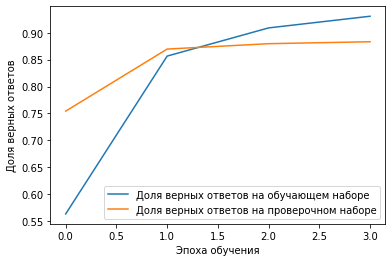

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 35s 44ms/step - loss: 0.3448 - accuracy: 0.8724


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.24


In [ ]:
sentence = "Wow this is a great movie I have ever seen. I would recommend it to everyone. Super actors as well!"

def vectorize_text(sentence):
  encoded = []

  for word in sentence.split():
    
    if word in word_index.keys():
      encoded.append(word_index[word])
    else:
      encoded.append(2)
  return encoded

print(vectorize_text(sentence))

[2, 11, 6, 3, 84, 17, 2, 25, 123, 2, 2, 59, 383, 9, 5, 2, 2, 153, 14, 2]


In [ ]:
text_encoding = vectorize_text(""" Jaws" by Steven Spielberg went down in history as the first blockbuster, but even then, in the 1970s, such a feature emerged that the continuation of the movie bombs turned out to be many times worse than the original when they tried to cash in on the glory of their predecessor. And on the example of Jaws, this sad trend is most clearly manifested, because the second part turned out to be no. It seems to have the same meaning, but everything is already perceived with indifference. A triquel is a completely separate conversation.

The 3D format is what ruined the film at the development stage. Even in our time, films that can be viewed in 3D are very surprising, and in the eighties such a marketing ploy worked flawlessly. And apparently, director Joe Elwes decided that only one three-dimensional image would be enough for the audience, therefore, among other things, only one thing needs to be added to the film - entertainment. This became the main principle when creating "Jaws 3D": everywhere as much entertainment as possible! A 7-meter white shark has turned into a real 10-meter megalodon, and events are no longer in the ocean, but in the aquarium. In theory, it was conceived successfully, but only nothing has progressed beyond the level of the idea. It makes you want to throw rotten tomatoes at the screen for a lazily assembled shark. Where did the well-made layout from the first part go? For unreliable movements and the appearance of a shark, the third Jaws have not yet been defeated only by the laziest critic.

I also want to throw something spoiled into the faces of all the characters appearing on the screen. The charisma of Sheriff Brody, student Cooper and fisherman Quint does not smell here. It's not that any of the cast in the third film is very annoying, but when all the characters think and behave in the same way, it looks terribly primitive. In addition, in this film, the shark attack on people is very indifferent. One can, of course, understand that one of us, the destroyers of nature, deserves such a fate, but not to the same extent as to rejoice because ... a dolphin survives.

But what really killed the third movie was the hacky special effects. Torn off fish heads and human hands, a bathyscaphe floating in the water column - everything looks indescribably miserable, created somehow, if only it was done at all. The apogee of this ignorance is the scene with a shark swimming towards the glass of an underwater tower. Someone is outraged that in these frames the shark does not move its fins, but in reality the fish does not swim at all: it is clearly visible that an enlarged image was simply superimposed on the background of the ocean. And this is with a budget of 20 million dollars! For comparison: the cost of "Alien" was half as much, but there is much more realism.

This movie is without hesitation one of the most mediocre sequels of all time. It's even more absurd than Jaws 4. Why, even the Italian "Cruel Jaws" of 1995 turned out to be much better. Perhaps for this reason, Jaws 3D is worth watching once - to have an idea of ​​​​how much it can ruin a well-started series of films.    """)

In [ ]:
x_val = pad_sequences(np.array(text_encoding).reshape(1,-1), maxlen=maxlen, padding='post')
print(x_val)

[[   21     5     1   169  2823    14     5 18206    85     2     3 26671
      2     2    48    63   553     1   837    17    13     1     2   315
      2     2   122  3105  1825     2   403     2     3     2  4690     8
      1  1090 14767     2   282   269 19813     2  1072     2    45    61
      9    13   221    30     2     2 45712     4    11  5482     6     1
    133    16     3  3307  4416   946     1  3059     4    32  6351     2
      2     6 12733    12     8   131  5870     1  3307   124    21   844
     91     2    18     8   632     1  3105   124    21  5013    30     2
      9     6   692  4684    12    32 29445  1456    13   328 14125    20
      1   975     4     1     2     2    11     6    16     3   349     4
    888  1428     2     2     2     1  2319     4     2    13   317    14
      2    18    47     6    73    50     2     2    17     6   206 10149
     28     4     1    88  1498  2286     4    29     2     2    57    50
   1752    71     2     2     2    57 

In [ ]:
model.predict(x_val)  #0 - 1

array([[0.28659043]], dtype=float32)

In [ ]:
y_test[-3:-1]

array([0, 0])

In [ ]:
x_test[-3:-1]

array([[   1,   13, 1408,   15,    8,  135,   14,    9,   35,   32,   46,
         394,   20,   62,   30, 5093,   21,   45,  184,   78,    4, 1492,
         910,  769, 2290, 2515,  395, 4257,    5, 1454,   11,  119,    2,
          89, 1036,    4,  116,  218,   78,   21,  407,  100,   30,  128,
         262,   15,    7,  185, 2280,  284, 1842,    2,   37,  315,    4,
         226,   20,  272, 2942,   40,   29,  152,   60,  181,    8,   30,
          50,  553,  362,   80,  119,   12,   21,  846, 5518,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
message = ''
for code in x_test[-2]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? in love 2 is the third movie it seemed that its creators took elements from the first two to make this one at the risk of giving out spoilers is kidnapped and the team has to get him back nothing new there a past love of is the bad guy that was done in the second movie the battle between and ? and is starting to get boring the movie has almost no action scenes in it and very little comedy i personally don't know what it's makers were thinking i gave this movie a vote of 4 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? "